In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [55]:
## loading yolo config file and yolo model
net = cv2.dnn.readNetFromDarknet("yolo-files\custom_yolov3.cfg",r"yolo-files\custom_yolov3_best.weights")

In [56]:
### custom classes for trained model 
classes = []
with open('yolo-files\classes.names','r') as f:
    classes = [line.strip() for line in f.readlines()]

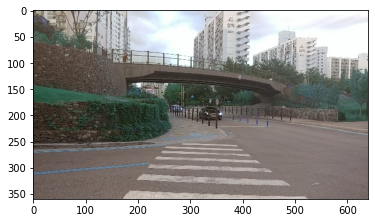

In [57]:
test_img = cv2.imread('images\cross1.jpg')
plt.imshow(test_img)

In [58]:
height,width,_ = test_img.shape

In [71]:
print(height, width, _)

360 640 3


In [59]:
# convert the image to yolo format
blob = cv2.dnn.blobFromImage(test_img, 1/255,(416,416),(0,0,0),swapRB = True,crop= False)

In [60]:
blob.shape

(1, 3, 416, 416)

In [72]:
blob

array([[[[0.43529415, 0.32156864, 0.34117648, ..., 0.9921569 ,
          0.9921569 , 0.9921569 ],
         [0.4431373 , 0.29411766, 0.2784314 , ..., 0.9921569 ,
          0.9921569 , 0.9921569 ],
         [0.4431373 , 0.25490198, 0.23137257, ..., 0.9921569 ,
          0.9921569 , 0.9921569 ],
         ...,
         [0.32156864, 0.34117648, 0.36862746, ..., 0.3647059 ,
          0.36078432, 0.37647063],
         [0.3137255 , 0.3137255 , 0.34509805, ..., 0.37647063,
          0.3529412 , 0.3529412 ],
         [0.3019608 , 0.29803923, 0.2901961 , ..., 0.4039216 ,
          0.40000004, 0.3803922 ]],

        [[0.48627454, 0.37254903, 0.40784317, ..., 1.        ,
          1.        , 1.        ],
         [0.49411768, 0.34901962, 0.34509805, ..., 1.        ,
          1.        , 1.        ],
         [0.49803925, 0.30980393, 0.29803923, ..., 1.        ,
          1.        , 1.        ],
         ...,
         [0.34901962, 0.36862746, 0.40000004, ..., 0.38823533,
          0.38823533, 0.4

In [73]:
net.setInput(blob)

In [74]:
last_layer = net.getUnconnectedOutLayersNames()

In [75]:
layer_output = net.forward(last_layer)

In [76]:
layer_output

(array([[6.7168519e-02, 3.9256450e-02, 1.1837794e-01, 2.5199699e-01,
         3.0881158e-06, 0.0000000e+00],
        [3.3163477e-02, 3.6274280e-02, 3.7692255e-01, 7.3119193e-01,
         1.3190077e-06, 0.0000000e+00],
        [3.7802804e-02, 4.3133244e-02, 2.5686743e+00, 8.1188715e-01,
         1.9308181e-05, 0.0000000e+00],
        ...,
        [9.6058083e-01, 9.6209329e-01, 7.7019870e-01, 3.7671721e-01,
         7.6400938e-06, 0.0000000e+00],
        [9.4089156e-01, 9.5695662e-01, 6.0162216e-01, 4.5476529e-01,
         1.7369864e-06, 0.0000000e+00],
        [9.6083766e-01, 9.8023695e-01, 8.3738589e-01, 8.0335897e-01,
         1.6217527e-05, 0.0000000e+00]], dtype=float32),
 array([[2.3997298e-02, 1.5956447e-02, 7.2178356e-02, 1.6514413e-01,
         4.0216942e-06, 0.0000000e+00],
        [2.3769835e-02, 1.7505987e-02, 2.5805357e-01, 4.6439845e-02,
         1.2531837e-05, 0.0000000e+00],
        [2.1687094e-02, 1.8132994e-02, 1.0181933e-01, 3.8966337e-01,
         5.6382737e-06, 0.000

In [64]:
layer_output[0].shape

(507, 6)

In [65]:
layer_output[0][0]

array([6.7168519e-02, 3.9256450e-02, 1.1837794e-01, 2.5199699e-01,
       3.0881158e-06, 0.0000000e+00], dtype=float32)

In [66]:
boxes =[]
confidences = []
class_ids = []

for output in layer_output:
    for detection in output:
        score = detection[5:]
        #print(score)
        class_id = np.argmax(score)
        print(class_id)
        confidence = score[class_id]
        #print(confidence)
        if confidence > 0.6:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3]* height)
            
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            boxes.append([x,y,w,h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [67]:
# find the bounding box
indexes = cv2.dnn.NMSBoxes(boxes,confidences,.6,.4)
indexes

()

In [68]:
boxes

[]